In [51]:
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model, model_from_json
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import pickle

In [37]:
pickle_in = open("trained_data/X_4_di_pa.pickle","rb")
X = pickle.load(pickle_in)

In [38]:
pickle_in = open("trained_data/y_4_di_pa.pickle","rb")
y = pickle.load(pickle_in)

In [55]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
print(CATEGORIES)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [3]:
def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

#### Version 1 to predict v2 and v3 = na

In [70]:
json_file = open("trained_model_files/angles/trained_model_angles_v3.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("trained_model_files/angles/trained_model_weights_angles_v3.h5")
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
img_path = 'im_base_to_angle/rotated_4_na/test/43/6508dd93de22405d878a4c7854933ba3.png'
img = image.load_img(img_path, target_size=(100, 100))
print(img)

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FB8371DA518>


In [74]:
prediction = loaded_model.predict([prepare(img_path)])
print(prediction)

[[3.74362381e-11 4.23853341e-10 2.88346170e-11 5.16050093e-12
  1.61997932e-11 3.52079965e-09 2.00125745e-12 6.83401460e-11
  9.52810422e-13 5.97374797e-13 8.63789509e-12 8.45811789e-12
  1.36221711e-11 3.63454877e-10 2.64104794e-10 4.93185048e-10
  3.50861873e-09 5.23517096e-09 9.29604102e-11 2.51368704e-10
  6.62567778e-10 6.81695034e-10 6.15835782e-09 3.25698669e-11
  6.72852182e-12 3.26418823e-11 5.27402699e-09 2.36530462e-09
  3.27507708e-11 1.05663989e-09 2.09717088e-09 3.23308647e-09
  1.80768822e-09 3.89896204e-09 6.37280062e-10 3.47356766e-09
  1.34418435e-10 2.70001466e-10 4.76552522e-08 1.60527929e-08
  1.81543601e-06 3.90007044e-05 9.97777522e-01 2.14889133e-03
  3.10134601e-05 2.30861055e-08 6.84027418e-11 4.87320011e-11
  8.93316532e-11 9.24436705e-09 2.64925415e-08 2.71667801e-07
  2.09688427e-08 4.72331028e-12 3.53485262e-11 7.10041123e-11
  5.99594818e-10 3.26776739e-09 3.96000654e-09 3.12539550e-09
  3.37227225e-11 5.49971801e-09 1.70766405e-08 1.43452294e-09
  2.6845

In [75]:
print(CATEGORIES[np.argmax(prediction)])

43


In [62]:
print(prediction[0][0])

1.6738253e-17


In [19]:
print(max(prediction[0]))

1.0


In [18]:
print(len(prediction[0]))

360


In [23]:
print(np.argmax(prediction))

179


In [16]:
print(prediction[0])

[1.12552781e-22 1.05375716e-27 5.85534595e-26 1.46823226e-24
 6.25435106e-25 9.98253124e-26 2.59876662e-21 6.93875300e-23
 1.08261535e-23 2.16418943e-21 6.35855312e-21 4.23918923e-19
 4.25989583e-24 7.20259220e-16 1.13247204e-19 2.02302706e-20
 2.04884353e-19 1.21445998e-19 1.34235283e-19 3.15934656e-20
 2.50387701e-20 1.28954020e-19 1.16989679e-19 5.00836705e-24
 9.52552598e-22 7.30707701e-20 4.20732074e-20 1.51728764e-21
 2.55068897e-22 1.14732851e-22 2.87802564e-18 7.84827933e-24
 1.16845562e-20 1.58577703e-23 6.48418723e-21 2.37102098e-20
 1.90652943e-19 1.01740206e-18 4.53226061e-19 5.87103658e-22
 5.11046372e-23 5.12469540e-23 1.82870660e-19 1.43055028e-22
 1.37741213e-21 5.30144757e-23 1.43241523e-18 9.22503323e-21
 2.72780942e-21 7.26774069e-20 9.90261015e-20 5.97824235e-25
 1.20803630e-21 7.10642153e-22 5.08543815e-22 1.15746837e-25
 6.34019359e-21 1.18112910e-20 2.92107898e-22 1.15433057e-22
 7.23675196e-21 6.79072056e-24 1.37097028e-20 2.68146469e-21
 4.54296357e-24 3.179527

(array([36., 36., 36., 36., 36., 36., 36., 36., 36., 36.]),
 array([  1. ,  36.9,  72.8, 108.7, 144.6, 180.5, 216.4, 252.3, 288.2,
        324.1, 360. ]),
 <a list of 10 Patch objects>)

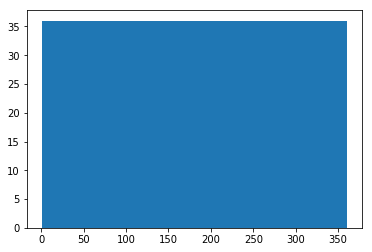

In [49]:
plt.hist(CATEGORIES_INT)

#### Version 2 to predict

In [36]:
prediction = loaded_model.predict([prepare(img_path)])

In [37]:
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [42]:
print(prediction[0][0])

0.0


In [44]:
print(CATEGORIES[int(prediction[0][0])])

1


#### Test trained model on dirty images with dirty images

In [60]:
json_file_dirty = open("trained_model_files/angles/trained_model_angles.json", "r")
loaded_model_json_dirty = json_file_dirty.read()
json_file.close()
loaded_model_dirty = model_from_json(loaded_model_json_dirty)
loaded_model_dirty.load_weights("trained_model_files/angles/trained_model_weights_angles.h5")
loaded_model_dirty.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
img_path = 'im_base_to_angle/r_d_i_pa/train/43/f17b2f28ff224dcc8c4a245755134beb.png'
img = image.load_img(img_path, target_size=(100, 100))
print(img)

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FB837E726A0>


In [62]:
def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [63]:
prediction = loaded_model_dirty.predict([prepare(img_path)])
print(prediction)

[[1.73455543e-08 2.91635871e-08 8.03023037e-10 4.25392447e-12
  2.70483330e-10 1.92778280e-12 1.92098854e-12 2.02942330e-10
  7.64373908e-07 1.49992206e-06 3.72431401e-08 2.52579071e-06
  9.72629977e-09 3.71874677e-13 2.48801452e-10 8.97020826e-12
  3.35962676e-13 5.07327798e-07 1.73676171e-10 4.72681144e-17
  1.19894112e-12 1.89715868e-10 1.15016446e-05 8.95281786e-08
  1.18841629e-11 4.32694001e-13 3.35579280e-08 2.94474473e-10
  9.08891723e-13 2.76746480e-15 5.52451748e-13 4.79851358e-12
  7.53752261e-09 3.17484261e-09 3.16607879e-10 3.09687714e-12
  3.62962438e-09 7.64095787e-10 1.26162602e-04 1.24415048e-04
  2.40368628e-11 9.29370730e-13 2.77815928e-07 2.04861017e-08
  9.56860191e-08 1.79926007e-09 1.69375156e-11 1.22104493e-09
  2.54887527e-06 4.45997102e-12 2.35555634e-13 3.43448325e-11
  7.99072234e-13 5.91247259e-11 2.33656899e-10 1.19298883e-17
  4.63809119e-14 3.70502434e-10 1.45914125e-08 1.34592977e-12
  8.15482224e-08 2.92300655e-07 9.15325436e-05 4.61564632e-04
  5.7949

In [64]:
print(CATEGORIES[np.argmax(prediction)])

164


In [65]:
print(np.argmax(prediction))

163
